In [1]:
import os
import cv2
import numpy as np

import albumentations as A
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def visualize(image, mask, original_image=None, original_mask=None, cmap='viridis'):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image, cmap=cmap)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask, cmap=cmap)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image, cmap=cmap)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask, cmap=cmap)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)
        
    for i in range(2):
        for j in range(2):
            ax[i, j].axis('off')
        
    plt.tight_layout()

In [4]:
image_dir = '../Datasets/Intel_Image_Classification'
annotation_dir = '../Datasets/Intel_Image_Classification/annotations'

In [5]:
train_image_dir = f"{image_dir}/seg_train/seg_train"
train_anno_dir = f"{annotation_dir}/train"

train_transforms = A.Compose([
    A.RandomResizedCrop(height=128, width=128, scale=(0.3, 1.0)),
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.OpticalDistortion(distort_limit=2, shift_limit=0.5, p=1)
])

In [8]:
train_image_dir = f"{image_dir}/seg_train/seg_train"
category = 'glacier'

image_list = os.listdir(f'{train_image_dir}/{category}')
image_id = image_list[np.random.randint(low=0, high=len(image_list))][:-4]

# get image and mask path
image_path = f'{train_image_dir}/{category}/{image_id}.jpg'
mask_path = f'{annotation_dir}/train/{category}/{image_id}.npy'
# get image and mask
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
mask = np.load(mask_path)

In [10]:
augmented = train_transforms(image=image, mask=mask)

image_transformed = augmented['image']
mask_transformed = augmented['mask']

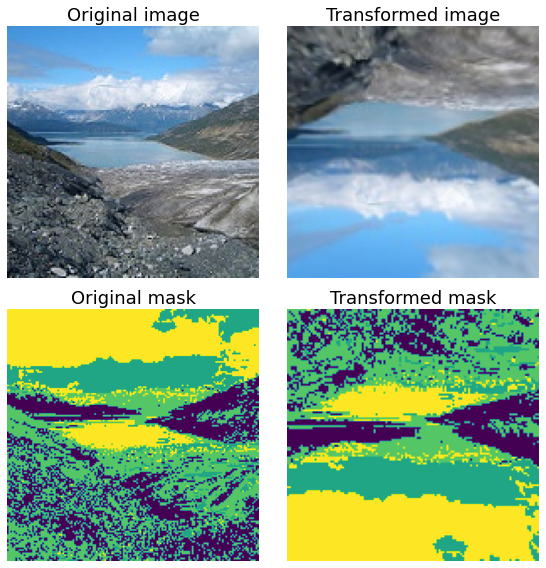

In [12]:
visualize(image_transformed, mask_transformed, original_image=image, original_mask=mask)